In [20]:
pip install gender-guesser

     |████████████████████████████████| 389kB 17.9MB/s 


In [21]:
pip install --upgrade networkx==1.11

     |████████████████████████████████| 1.3MB 16.0MB/s 
ERROR: scikit-image 0.16.2 has requirement networkx>=2.0, but you'll have networkx 1.11 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: networkx 2.5.1
    Uninstalling networkx-2.5.1:
      Successfully uninstalled networkx-2.5.1


In [22]:
import gender_guesser.detector as gender

In [23]:
import csv
import progressbar
import gender_guesser.detector as gender
with open('movie_metadata.csv','r',encoding="utf8") as file:
    galdata=[]
    read=csv.reader(file)
    arr=[2,3,4,5,7,8,9,11,12,13,15,16,18,19,21,22,24,25,26,27]
    moviearr=[]
    Moviedict={}              # Movies dictionary
    matrix=[]
    ultimatemoviedata=[]
    arrayfornodes=[]               # arrays for node
    lop=0
    for row in read:
        if(len(row[0])!=0 and len(row[1])!=0 and len(row[2])!=0 and len(row[3])!=0 and len(row[4])!=0 and len(row[10])!=0 and
          len(row[7])!=0 and len(row[6])!=0 and len(row[24])!=0 and len(row[14])!=0 and len(row[5])!=0 and len(row[8])!=0 and 
          len(row[9])!=0 and len(row[11])!=0 and len(row[12])!=0 and len(row[13])!=0 and len(row[15])!=0 and len(row[16])!=0 and
          len(row[17])!=0 and len(row[18])!=0 and len(row[19])!=0 and len(row[20])!=0 and len(row[21])!=0 and len(row[22])!=0 and
          len(row[23])!=0 and len(row[25])!=0 and len(row[26])!=0 and len(row[27])!=0 ):
            galdata.append(row)
        #print(row)
        if(lop==0):
            lop+=1
        else:
            if(row[1] not in arrayfornodes):
                arrayfornodes.append(row[1])
            if(row[6] not in arrayfornodes):
                arrayfornodes.append(row[6])
            if(row[10] not in arrayfornodes):
                arrayfornodes.append(row[10])
            if(row[11].split('\xa0')[0] not in arrayfornodes):
                arrayfornodes.append(row[11].split('\xa0')[0])
            ultimatemoviedata.append(row)
        #print(row[11].split('\xa0')[0]+row[23])
        if(len(row[23])==0):
            print(row[11].split('\xa0')[0])
            moviearr.append(row[11].split('\xa0')[0])
        else:
            moviearr.append(row[11].split('\xa0')[0]+row[23])
        Moviedict[row[11].split('\xa0')[0]+row[23]]=[]
        Moviedict[row[11].split('\xa0')[0]+row[23]].append(row[1])
        Moviedict[row[11].split('\xa0')[0]+row[23]].append(row[6])
        Moviedict[row[11].split('\xa0')[0]+row[23]].append(row[10])
        Moviedict[row[11].split('\xa0')[0]+row[23]].append(row[14])
        details=[]
        for i in range(len(row)):
            if(i not in arr):
                details.append(row[i])
        matrix.append(details)
    #print(matrix)                           # this matrix contains the all relevant data 
    arr1=[1,2,3,4]
    detailsofactoranddirector=[]
    detailsofactoranddirector.append(['Type','Name'])
    id=0
    dic={'ACTOR':[],'Name':[],'DIRECTOR':[],'ACTOR-DIRECTOR':[]}
    for j in matrix:
        for d in range(len(j)):
            if(id!=0):
                arr2=[]
                if(d==1):
                    arr2.append('DIRECTOR')
                    arr2.append(j[d])
                    detailsofactoranddirector.append(arr2)
                    if(j[d] not in dic['DIRECTOR']):
                        dic['DIRECTOR'].append(j[d])
                if(d==2):
                    arr2.append('ACTOR')
                    arr2.append(j[d])
                    detailsofactoranddirector.append(arr2)
                    if(j[d] not in dic['ACTOR']):
                        dic['ACTOR'].append(j[d])
                if(d==3):
                    arr2.append('ACTOR')
                    arr2.append(j[d])
                    detailsofactoranddirector.append(arr2)
                    if(j[d] not in dic['ACTOR']):
                        dic['ACTOR'].append(j[d])
                if(d==4):
                    arr2.append('ACTOR')
                    arr2.append(j[d])
                    detailsofactoranddirector.append(arr2)
                    if(j[d] not in dic['ACTOR']):
                        dic['ACTOR'].append(j[d])
        id+=1
    #print(detailsofactoranddirector)                            # we get the ACtor director details
    #print(dic)                                                # we get dictionary of actor director details
    actordirectoradded=[]
    print("BEFORE",len(dic['ACTOR']),len(dic['DIRECTOR']),len(dic['ACTOR-DIRECTOR']))
    for aq in dic['ACTOR']:
        for aq1 in dic['DIRECTOR']:
            if(aq==aq1):
                dic['ACTOR-DIRECTOR'].append(aq)
                dic['DIRECTOR'].remove(aq)
                dic['ACTOR'].remove(aq)
    print('AFTER',len(dic['ACTOR']),len(dic['DIRECTOR']),len(dic['ACTOR-DIRECTOR']))
    Alldetailsofactor=[]
    Alldetailsofactor.append(['TYPE','NAME','GENDER'])
    bar = progressbar.ProgressBar()
    d = gender.Detector()
    for dgh in bar(dic['ACTOR']):
        dgh1=dgh
        dgh=dgh.split(' ')
        dgh=dgh[0]
        ge=d.get_gender(u'%s'%dgh)
        acg=[]
        acg.append('ACTOR')
        acg.append(dgh1)
        acg.append(ge)
        Alldetailsofactor.append(acg)
    #print(Alldetailsofactor)
    bar = progressbar.ProgressBar()
    for dgh in bar(dic['DIRECTOR']):
        dgh1=dgh
        dgh=dgh.split(' ')
        dgh=dgh[0]
        ge=d.get_gender(u'%s'%dgh)
        acg=[]
        acg.append('DIRECTOR')
        acg.append(dgh1)
        acg.append(ge)
        Alldetailsofactor.append(acg)
    #print(Alldetailsofactor)
    bar = progressbar.ProgressBar()
    for dgh in bar(dic['ACTOR-DIRECTOR']):
        dgh1=dgh
        dgh=dgh.split(' ')
        dgh=dgh[0]
        ge=d.get_gender(u'%s'%dgh)
        acg=[]
        acg.append('ACTOR-DIRECTOR')
        acg.append(dgh1)
        acg.append(ge)
        Alldetailsofactor.append(acg)
print(Alldetailsofactor) # Name type and gender but not confirm that all are unique or not

Star Wars: Episode VII - The Force Awakens
Miami Vice
The A-Team
10,000 B.C.
Hannibal
Daredevil
Bewitched
Constantine
Life
Sleepy Hollow
Last Man Standing
The Missing
Rules of Engagement
Sabrina, the Teenage Witch
Sex and the City
Anger Management
Stargate SG-1
Unforgotten
A Touch of Frost
Twisted
Defiance
Outlander
The Returned
McHale's Navy
Arthur
3rd Rock from the Sun
Rush Hour
Hit the Floor
Luther
Friday Night Lights
The Family
Entourage
Trapped
12 Monkeys
Limitless
The Honeymooners
It's Always Sunny in Philadelphia
Shaun the Sheep
The Powerpuff Girls
Rogue
The Bachelor
Meet the Browns
Yu-Gi-Oh! Duel Monsters
Fired Up
Perception
The Doombolt Chase
Gone, Baby, Gone
The O.C.
Unforgettable
Carlos
The Messengers
Lilyhammer
Scream: The TV Series
The Dead Zone
The Company
Towering Inferno
Ghost Hunters
Dekalog
The Border
Del 1 - Män som hatar kvinnor
Spartacus: War of the Damned
Lovesick
Bones
Dekalog
The Bold and the Beautiful
Star Wars: The Clone Wars
The Player
Preacher
Wuthering Heig

100% (6098 of 6098) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (2241 of 2241) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (158 of 158) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


[['TYPE', 'NAME', 'GENDER'], ['ACTOR', 'Joel David Moore', 'male'], ['ACTOR', 'CCH Pounder', 'unknown'], ['ACTOR', 'Wes Studi', 'male'], ['ACTOR', 'Orlando Bloom', 'male'], ['ACTOR', 'Johnny Depp', 'male'], ['ACTOR', 'Jack Davenport', 'male'], ['ACTOR', 'Rory Kinnear', 'male'], ['ACTOR', 'Christoph Waltz', 'male'], ['ACTOR', 'Stephanie Sigman', 'female'], ['ACTOR', 'Christian Bale', 'male'], ['ACTOR', 'Tom Hardy', 'male'], ['ACTOR', 'Rob Walker', 'male'], ['ACTOR', '', 'unknown'], ['ACTOR', 'Samantha Morton', 'female'], ['ACTOR', 'Daryl Sabara', 'mostly_male'], ['ACTOR', 'Polly Walker', 'female'], ['ACTOR', 'James Franco', 'male'], ['ACTOR', 'J.K. Simmons', 'unknown'], ['ACTOR', 'Kirsten Dunst', 'female'], ['ACTOR', 'Donna Murphy', 'female'], ['ACTOR', 'Brad Garrett', 'male'], ['ACTOR', 'M.C. Gainey', 'unknown'], ['ACTOR', 'Robert Downey Jr.', 'male'], ['ACTOR', 'Chris Hemsworth', 'mostly_male'], ['ACTOR', 'Scarlett Johansson', 'female'], ['ACTOR', 'Daniel Radcliffe', 'male'], ['ACTOR'

In [24]:
print(len(Alldetailsofactor))
print(Moviedict) ##########33 Movie dictionary


8498
{'movie_titletitle_year': ['director_name', 'actor_2_name', 'actor_1_name', 'actor_3_name'], 'Avatar2009': ['James Cameron', 'Joel David Moore', 'CCH Pounder', 'Wes Studi'], "Pirates of the Caribbean: At World's End2007": ['Gore Verbinski', 'Orlando Bloom', 'Johnny Depp', 'Jack Davenport'], 'Spectre2015': ['Sam Mendes', 'Rory Kinnear', 'Christoph Waltz', 'Stephanie Sigman'], 'The Dark Knight Rises2012': ['Christopher Nolan', 'Christian Bale', 'Tom Hardy', 'Joseph Gordon-Levitt'], 'Star Wars: Episode VII - The Force Awakens': ['Doug Walker', 'Rob Walker', 'Doug Walker', ''], 'John Carter2012': ['Andrew Stanton', 'Samantha Morton', 'Daryl Sabara', 'Polly Walker'], 'Spider-Man 32007': ['Sam Raimi', 'James Franco', 'J.K. Simmons', 'Kirsten Dunst'], 'Tangled2010': ['Nathan Greno', 'Donna Murphy', 'Brad Garrett', 'M.C. Gainey'], 'Avengers: Age of Ultron2015': ['Joss Whedon', 'Robert Downey Jr.', 'Chris Hemsworth', 'Scarlett Johansson'], 'Harry Potter and the Half-Blood Prince2009': ['Da

In [25]:
print(arrayfornodes) # All data including movie acotr director

['James Cameron', 'Joel David Moore', 'CCH Pounder', 'Avatar', 'Gore Verbinski', 'Orlando Bloom', 'Johnny Depp', "Pirates of the Caribbean: At World's End", 'Sam Mendes', 'Rory Kinnear', 'Christoph Waltz', 'Spectre', 'Christopher Nolan', 'Christian Bale', 'Tom Hardy', 'The Dark Knight Rises', 'Doug Walker', 'Rob Walker', 'Star Wars: Episode VII - The Force Awakens', 'Andrew Stanton', 'Samantha Morton', 'Daryl Sabara', 'John Carter', 'Sam Raimi', 'James Franco', 'J.K. Simmons', 'Spider-Man 3', 'Nathan Greno', 'Donna Murphy', 'Brad Garrett', 'Tangled', 'Joss Whedon', 'Robert Downey Jr.', 'Chris Hemsworth', 'Avengers: Age of Ultron', 'David Yates', 'Daniel Radcliffe', 'Alan Rickman', 'Harry Potter and the Half-Blood Prince', 'Zack Snyder', 'Lauren Cohan', 'Henry Cavill', 'Batman v Superman: Dawn of Justice', 'Bryan Singer', 'Marlon Brando', 'Kevin Spacey', 'Superman Returns', 'Marc Forster', 'Mathieu Amalric', 'Giancarlo Giannini', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man'

In [26]:
# Now we making the edges.csv file 
edges=[]
tio=0
for i in Moviedict:
    if(tio==0):
        ary=[]
        ary.append("Source")
        ary.append("Target")
        ary.append("Weight")
        ary.append("Type")
        edges.append(ary)
    if(tio>0):
        ilu=0
        artic=[]
        for itt in range(len(Moviedict[i])):
            arry=[]
            arry.append(i)
            arry.append(Moviedict[i][itt])
            arry.append("1")
            arry.append("Undirected")
            artic.append(Moviedict[i][itt])
            edges.append(arry)
        for ia in range(len(artic)):
            if(ilu==0):
                for doc in ultimatemoviedata:
                    arry1=[]
                    if(Moviedict[i][ia]==doc[1] and i!=doc[11][:-1]+doc[23]):
                        arry1.append(Moviedict[i][ia])
                        arry1.append(doc[11][:-1]+doc[23])
                        arry1.append("1")
                        arry1.append("Undirected")
                        edges.append(arry1)
            if(ilu==1):
                for doc in ultimatemoviedata:
                    arry1=[]
                    if(Moviedict[i][ia]==doc[6] and i!=doc[11][:-1]+doc[23]):
                        arry1.append(Moviedict[i][ia])
                        arry1.append(doc[11][:-1]+doc[23])
                        arry1.append("1")
                        arry1.append("Undirected")
                        edges.append(arry1)
            if(ilu==2):
                for doc in ultimatemoviedata:
                    arry1=[]
                    if(Moviedict[i][ia]==doc[14] and i!=doc[11][:-1]+doc[23]):
                        arry1.append(Moviedict[i][ia])
                        arry1.append(doc[11][:-1]+doc[23])
                        arry1.append("1")
                        arry1.append("Undirected")
                        edges.append(arry1)
            ilu+=1
    tio+=1
print(len(edges))

59685


In [27]:
with open("edgesfile.csv", 'w',encoding="utf8") as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
    for row in edges:
        csvwriter.writerow(row) 

In [28]:
nodesarr=[]

for i in range(len(arrayfornodes)):
    np1=[]
    np1.append(arrayfornodes[i])
    np1.append(i)
    nodesarr.append(np1)
#print(nodesarr)
with open("nodesfile.csv", 'w',encoding="utf8") as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['NodeName','Nodeid']) 
    csvwriter.writerows(nodesarr) 

In [29]:
print(dic['ACTOR'][0])

Joel David Moore


In [30]:
class Mo:
    def __init__(self,dataRow):
        self.col = dataRow[0] == "color"
        self.dnam = dataRow[1]
        self.nrc = int(dataRow[2])
        self.dm = int(dataRow[3])
        self.dfl = int(dataRow[4])
        # Store as many actors as possible
        self.an = list()
        self.afl = list()
        if len(dataRow[10]) > 0:
            self.an.append(dataRow[10])
            self.afl.append(int(dataRow[7]))
        if len(dataRow[6]) > 0:
            self.an.append(dataRow[6])
            self.afl.append(int(dataRow[24]))
        if len(dataRow[14]) > 0:
            self.an.append(dataRow[14])
            self.afl.append(int(dataRow[5]))
        self.gr = int(dataRow[8])
        self.gen = dataRow[9].split("|")
        self.tit = dataRow[11]
        self.nvu = int(dataRow[12])
        self.cfl = int(dataRow[13])
        self.npf = int(dataRow[15])
        self.pk = dataRow[16].split("|")
        self.inu = dataRow[17]
        self.nru = int(dataRow[18])
        self.lan = dataRow[19]
        self.con = dataRow[20]
        self.cr = dataRow[21]
        self.bd = int(dataRow[22])
        self.ry = int(dataRow[23])
        self.imds = float(dataRow[25])
        self.acr = float(dataRow[26])
        self.mfl = int(dataRow[27])
    def __str__(self):
        strinh = "-----'%s' (%i)-----\n Color: %s\n Director: %s\n Review Critics: %i\n Duration (min): %i\n
        Director FB Likes: %i\n Main actors: %s\n Actors FB Likes: %s\n Gross: %i\n Genres: %s\n Voting users: %i\n
        Cast FB Likes: %i\n # Poster Faces: %i\n Plot keywords: %s\n IMDB URL: %s\n # Review Users: %i\n Language: %s\n
        Country: %s\n Rating: %s\n Budget: %i\n IMDB Score: %f\n Aspect ratio: %f\n Movie FB likes: %i\n
        " % (self.tit, self.ry,self.col,self.dnam,self.nrc,self.dm,self.dfl,self.an,self.afl,self.gr,self.gen,self.nvu,self.cfl
           ,self.npf,self.pk,self.inu,self.nru,self.lan,self.con,self.cr,self.bd,self.imds,self.acr,self.mfl)
        return strinh

In [31]:
nody=[]
for i in range(len(dic)):
    if(i==0):
        for j in dic['ACTOR']:
            arrp=[]
            arrp.append(j)
            arrp.append(j)
            arrp.append('ACTOR')
            nody.append(arrp)
    if(i==1):
        for j in dic['DIRECTOR']:
            arrp=[]
            arrp.append(j)
            arrp.append(j)
            arrp.append('DIRECTOR')
            nody.append(arrp)
    if(i==2):
        for j in dic['ACTOR-DIRECTOR']:
            arrp=[]
            arrp.append(j)
            arrp.append(j)
            arrp.append('ACTOR-DIRECTOR')
            nody.append(arrp)
for qu in Moviedict:
    arrp=[]
    arrp.append(qu)
    arrp.append(qu)
    arrp.append('MOVIE')
    nody.append(arrp)
with open("nody.csv", 'w',encoding="utf8") as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['ID','Label','Classification']) 
    csvwriter.writerows(nody)    

In [32]:
class Person:

    def __init__(self, name):
        self.name = name
        self.gender = None
        self.race = None
    def __str__(self):
        return "%s, Gender: %s, Race: %s" % (self.name, self.gender, self.race)


In [33]:
pip install IMDbPY

     |████████████████████████████████| 307kB 13.8MB/s 


In [34]:
import networkx as nx
import imdb
ia = imdb.IMDb()
MovieMap={}
i1=0
bar = progressbar.ProgressBar()
idp=0
for mo in bar(galdata):
    if(idp==0):
        idp+=1
    else:
        mocieobject=Mo(mo)    
        MovieMap[mo[11].split('\xa0')[0]+mo[23]]=mocieobject#mo[11].split('\xa0')[0]
        #print(doca)
#print(MovieMap)
ActorMap={}
d = gender.Detector()
for doig in galdata:
    ge=d.get_gender(u'%s'%doig[6])
    ActorMap[doig[6]]=Person(doig[6])#"%s, Gender: %s, Race: %s"%(doig[6],ge,'unknown')
    ge=d.get_gender(u'%s'%doig[10])
    ActorMap[doig[10]]=Person(doig[10])#"%s, Gender: %s, Race: %s"%(doig[10],ge,'unknown')
    ge=d.get_gender(u'%s'%doig[14])
    ActorMap[doig[14]]=Person(doig[14])#"%s, Gender: %s, Race: %s"%(doig[14],ge,'unknown')
print(ActorMap)
#ActorMap={}
#for j in Alldetailsactor:
#    if(j[0]=='ACTOR'):
#        ActorMap[j[1]]="%s, Gender: %s, Race: %s"%(j[1],j[2],'unknown')
#print(ActorMap)

100% (3757 of 3757) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


{'actor_2_name': <__main__.Person object at 0x7f1dc9c30310>, 'actor_1_name': <__main__.Person object at 0x7f1dc9c302d0>, 'actor_3_name': <__main__.Person object at 0x7f1dc9c30290>, 'Joel David Moore': <__main__.Person object at 0x7f1dc9c7e690>, 'CCH Pounder': <__main__.Person object at 0x7f1dcb497b90>, 'Wes Studi': <__main__.Person object at 0x7f1dc9f76810>, 'Orlando Bloom': <__main__.Person object at 0x7f1dcc9f53d0>, 'Johnny Depp': <__main__.Person object at 0x7f1dc9c6bb90>, 'Jack Davenport': <__main__.Person object at 0x7f1dcb4aab90>, 'Rory Kinnear': <__main__.Person object at 0x7f1dc9c82690>, 'Christoph Waltz': <__main__.Person object at 0x7f1dc9f8e350>, 'Stephanie Sigman': <__main__.Person object at 0x7f1dc9c30050>, 'Christian Bale': <__main__.Person object at 0x7f1dc9f853d0>, 'Tom Hardy': <__main__.Person object at 0x7f1dc9f97250>, 'Joseph Gordon-Levitt': <__main__.Person object at 0x7f1dcb49f390>, 'Samantha Morton': <__main__.Person object at 0x7f1dc9e5d690>, 'Daryl Sabara': <__m

In [35]:
DirectorMap={}
d = gender.Detector()
for doig in galdata:
    if(doig[1]!='director_name'):
        ge=d.get_gender(u'%s'%doig[1])
        DirectorMap[doig[1]]=Person(doig[1])#"%s, Gender: %s, Race: %s"%(doig[6],ge,'unknown')
print(DirectorMap)
#DirectorMap={}
#for j in Alldetailsofactor:
#    if(j[0]=='DIRECTOR'):
#        DirectorMap[j[1]]="%s, Gender: %s, Race: %s"%(j[1],j[2],'unknown')
#print(DirectorMap)

{'James Cameron': <__main__.Person object at 0x7f1dbe098910>, 'Gore Verbinski': <__main__.Person object at 0x7f1dbe08b0d0>, 'Sam Mendes': <__main__.Person object at 0x7f1dbe09dfd0>, 'Christopher Nolan': <__main__.Person object at 0x7f1dbc789fd0>, 'Andrew Stanton': <__main__.Person object at 0x7f1dbc771ed0>, 'Sam Raimi': <__main__.Person object at 0x7f1dbe09ced0>, 'Nathan Greno': <__main__.Person object at 0x7f1dbc8a3ad0>, 'Joss Whedon': <__main__.Person object at 0x7f1dbc771c10>, 'David Yates': <__main__.Person object at 0x7f1dbcbf3610>, 'Zack Snyder': <__main__.Person object at 0x7f1dbc792cd0>, 'Bryan Singer': <__main__.Person object at 0x7f1dbe098d90>, 'Marc Forster': <__main__.Person object at 0x7f1dbc783d90>, 'Andrew Adamson': <__main__.Person object at 0x7f1dbc8a3890>, 'Rob Marshall': <__main__.Person object at 0x7f1dbe0a34d0>, 'Barry Sonnenfeld': <__main__.Person object at 0x7f1dbe0a9cd0>, 'Peter Jackson': <__main__.Person object at 0x7f1dbc786e50>, 'Marc Webb': <__main__.Person 

In [36]:
import pandas as pd
import numpy as np
import bs4
import requests
import urllib
import urllib.request
import re

from bs4 import BeautifulSoup
from urllib.request import urlretrieve 
from urllib.request import urlopen, Request
def func(name):
    namar=name.split(" ")
    j=0
    for i in namar:
        if(j==0):
            name=i
            j=j+1
        else:
            name=name+"+"+i
    url="http://search.nndb.com/search/?type=unspecified&query="+name
    html=urlopen(url)
    #soup=BeautifulSoup(url)
    soup = BeautifulSoup(html, 'lxml')
    #print(soup.prettify())
    web_links=soup.find_all("a")
    arrl=[]
    arrt=[]
    for link in web_links:
        arrl.append(link.get("href"))
        arrt.append(link.text)
    #print(arrl)
    #print(arrt)
    return arrl,arrt

In [37]:
def func1(lin):
    url=lin
    html=urlopen(url)
    #soup=BeautifulSoup(url)
    soup = BeautifulSoup(html, 'lxml')
    #print(soup.prettify())
    #web_links=soup.find_all("p")
    arrgr=soup.text.split()
    return arrgr

In [38]:
# converting the gender and race to the actordict and director dictionary
def Convertracegender(actorDict):
    if(len(actorDict["name"])>0 and isEnglish(actorDict["name"])==True):
        #print(actorDict["name"])
        arrl,arrt=func(actorDict["name"])
        val=[]
        for idfy in range(len(arrt)):
            #print(arrt[idfy].capitalize(),"James Camerson".capitalize())
            if(actorDict["name"].capitalize()==arrt[idfy].capitalize()):
                val=func1(arrl[idfy])
        doli=0
        for diao in val:
            if(len(diao)>=len("male")):
                if(diao[0:4].capitalize()=="male".capitalize()):
                    actorDict["gender"]="MALE"
                if(len(diao)>=len("female")):
                    if(diao[0:6].capitalize()=="female".capitalize()):
                        actorDict["gender"]="FEMALE"
                else:
                    gender="male".capitalize()
            if(diao==("Ethnicity"+":")):
                if(len(val[doli+1])>len("Asian") and val[doli+1][0:5].capitalize()=="Asian".capitalize()):
                    actorDict["race"]=val[doli+1][0:5].capitalize()
                elif(len(val[doli+1])>=len("black") and val[doli+1][0:5].capitalize()=="black".capitalize()):
                    actorDict["race"]=val[doli+1][0:5].capitalize()
                elif(len(val[doli+1])>=len("white") and val[doli+1][0:5].capitalize()=="white".capitalize()):
                    actorDict["race"]=val[doli+1][0:5].capitalize()
                elif(len(val[doli+1])>=len("Multiracial") and val[doli+1][0:11].capitalize()=="Multiracial".capitalize()):
                    actorDict["race"]=val[doli+1][0:11].capitalize()
                elif(len(val[doli+1])==len("Asian") and val[doli+1][0:5].capitalize()=="Asian".capitalize()):
                    actorDict["race"]=val[doli+1][0:5].capitalize()+val[doli+2][0:5].capitalize()
                elif(len(val[doli+1])==len("Middle") and val[doli+1][0:6].capitalize()=="Middle".capitalize()):
                    actorDict["race"]=val[doli+1][0:6].capitalize()+val[doli+2][0:7].capitalize()
                elif(len(val[doli+1])==len("American") and val[doli+1][0:8].capitalize()=="American".capitalize()):
                    actorDict["race"]=val[doli+1][0:8].capitalize()+val[doli+2][0:5].capitalize()
                elif(len(val[doli+1])>=len("Hispanic") and  val[doli+1][0:8].capitalize()=="Hispanic".capitalize()):
                    actorDict["race"]=val[doli+1][0:8].capitalize()
                else:
                    race="white".capitalize()
            doli+=1
    return actorDict

In [39]:
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [40]:
graph = nx.DiGraph()
graphdict={}
bar1 = progressbar.ProgressBar()
for movieID in bar1(MovieMap):
    movie=MovieMap[movieID]
    #print(movieID[:-4])
    nextNodeID = graph.number_of_nodes()
    #print(nextNodeID)
    graph.add_node(nextNodeID, type="MOVIE")
    movieDict={}
    jak=0
    for mo in galdata:
        #if((movieID in mo)==True and jak==0):
        if(movieID==mo[11].split('\xa0')[0]+mo[23] and jak==0 and len(mo[0])!=0 and len(mo[1])!=0 and len(mo[2])!=0 and 
           len(mo[3])!=0 and len(mo[4])!=0 and len(mo[10])!=0 and len(mo[7])!=0 and len(mo[6])!=0 and len(mo[24])!=0 
           and len(mo[14])!=0 and len(mo[5])!=0 and len(mo[8])!=0 and len(mo[9])!=0 and len(mo[11])!=0 and len(mo[12])!=0 
           and len(mo[13])!=0 and len(mo[15])!=0 and len(mo[16])!=0 and len(mo[17])!=0 and len(mo[18])!=0 and 
           len(mo[19])!=0 and len(mo[20])!=0 and len(mo[21])!=0 and len(mo[22])!=0 and len(mo[23])!=0 and len(mo[25])!=0 
           and len(mo[26])!=0 and len(mo[27])!=0 ):
            inColor = mo[0] == "Color"
            directorName = mo[1]
            numReviewCritics = int(mo[2])
            durationMinutes = int(mo[3])
            actorNames = list()
            actorsFacebookLikes = list()
            if len(mo[10]) > 0:
                actorNames.append(mo[10])
                actorsFacebookLikes.append(int(mo[7]))
            if len(mo[6]) > 0:
                actorNames.append(mo[6])
                actorsFacebookLikes.append(int(mo[24]))
            if len(mo[14]) > 0:
                actorNames.append(mo[14])
                actorsFacebookLikes.append(int(mo[5]))
            gross = int(mo[8])
            genres = mo[9].split("|")
            title = mo[11]
            numVotingUsers = int(mo[12])
            castFacebookLikes = int(mo[13])
            numPosterFaces = int(mo[15])
            plotKeywords = mo[16].split("|")
            imdbURL = mo[17]
            numReviewUsers = int(mo[18])
            language = mo[19]
            country = mo[20]
            contentRating = mo[21]
            budget = int(mo[22])
            releaseYear = int(mo[23])
            imdbScore = float(mo[25])
            aspectRatio = float(mo[26])
            directorFacebookLikes=int(mo[4])
            movieFacebookLikes = int(mo[27])
            movieDict["inColor"] = inColor
            movieDict["directorName"] = directorName
            movieDict["numReviewCritics"] = numReviewCritics
            movieDict["durationMinutes"] =durationMinutes
            movieDict["directorFacebookLikes"] = directorFacebookLikes
            movieDict["actorNames"] = actorNames
            movieDict["actorsFacebookLikes"] = actorsFacebookLikes
            movieDict["gross"] = gross
            movieDict["genres"] = genres
            movieDict["title"] = title
            movieDict["numVotingUsers"] = numVotingUsers
            movieDict["castFacebookLikes"] = castFacebookLikes
            movieDict["numPosterFaces"] = numPosterFaces
            movieDict["plotKeywords"] = plotKeywords
            movieDict["imdbURL"] = imdbURL
            movieDict["numReviewUsers"] = numReviewUsers
            movieDict["language"] = language
            movieDict["country"] = country
            movieDict["contentRating"] = contentRating
            movieDict["budget"] = budget
            movieDict["releaseYear"] = releaseYear
            movieDict["imdbScore"] = imdbScore
            movieDict["aspectRatio"] = aspectRatio
            movieDict["movieFacebookLikes"] = movieFacebookLikes
            jak+=1
    #print(movieDict)
    for key in movieDict:
      graph.node[nextNodeID][key] = movieDict[key]
    graphdict[movie] = nextNodeID
    #print(nextNodeID)
    movieNodeID = graphdict[MovieMap[movieID]]
    #print(movieNodeID)
    actors = [ActorMap[name] for name in movie.an]
    for actor in actors:
        #print(actor.name)
        if not actor.name in graphdict:
            nextNodeID = graph.number_of_nodes()
            graph.add_node(nextNodeID, type="ACTOR")
            actorDict = {}
            actorDict["name"] = actor.name
            actorDict["gender"] = actor.gender
            actorDict["race"] = actor.race
            actorDict=Convertracegender(actorDict)
            for key in actorDict:
                graph.node[nextNodeID][key] = actorDict[key]
            graphdict[actor.name] = nextNodeID
        elif graph.node[graphdict[actor.name]]["type"] == "DIRECTOR":
            graph.node[graphdict[actor.name]]["type"] = "DIRECTOR"
        graph.add_edge(movieNodeID, graphdict[actor.name])
    director=DirectorMap[movie.dnam]
    if not director.name in graphdict:
        nextNodeID = graph.number_of_nodes()
        graph.add_node(nextNodeID, type="DIRECTOR")
        #directorDict = director.toDict()
        directordict = {}
        directordict["name"] = director.name
        directordict["gender"] = director.gender
        directordict["race"] = director.race
        directordict=Convertracegender(directordict)
        for key in directordict:
            graph.node[nextNodeID][key] = directordict[key]
        graphdict[director.name] = nextNodeID
    elif graph.node[graphdict[director.name]]["type"] == "ACTOR":
        graph.node[graphdict[director.name]]["type"] = "ACTOR-DIRECTOR"
    graph.add_edge(graphdict[director.name], movieNodeID)
    #actors = [ActorMap[name] for name in movie.actorNames]
    #print(actorDict)

100% (3656 of 3656) |####################| Elapsed Time: 0:47:24 Time:  0:47:24


yes


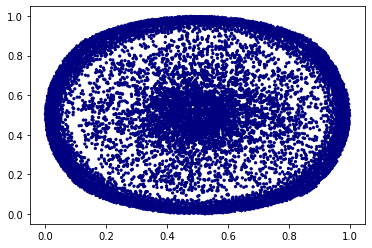

In [41]:
values = [graphdict.get(node, 0.25) for node in graph.nodes()]
import matplotlib.pyplot as plt
#graph.show()
pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, pos, cmap=plt.get_cmap('jet'),node_color = values, node_size = 5)
print("yes")
#nx.draw_networkx_labels(graph, pos)
plt.show()

In [42]:
import community
import matplotlib.pyplot as plt
import networkx as nx


In [43]:
print("hello")

<bound method Graph.nodes of <networkx.classes.digraph.DiGraph object at 0x7f1dbddd09d0>>
<bound method Graph.nodes of <networkx.classes.digraph.DiGraph object at 0x7f1dbddd09d0>>
<bound method Graph.nodes of <networkx.classes.digraph.DiGraph object at 0x7f1dbddd09d0>>
<bound method Graph.nodes of <networkx.classes.digraph.DiGraph object at 0x7f1dbddd09d0>>
<bound method Graph.nodes of <networkx.classes.digraph.DiGraph object at 0x7f1dbddd09d0>>
<bound method Graph.nodes of <networkx.classes.digraph.DiGraph object at 0x7f1dbddd09d0>>
<bound method Graph.nodes of <networkx.classes.digraph.DiGraph object at 0x7f1dbddd09d0>>
<bound method Graph.nodes of <networkx.classes.digraph.DiGraph object at 0x7f1dbddd09d0>>
<bound method Graph.nodes of <networkx.classes.digraph.DiGraph object at 0x7f1dbddd09d0>>
<bound method Graph.nodes of <networkx.classes.digraph.DiGraph object at 0x7f1dbddd09d0>>
<bound method Graph.nodes of <networkx.classes.digraph.DiGraph object at 0x7f1dbddd09d0>>
<bound met

In [44]:
print("hello")

In [45]:
#graph.node[1]
galdata[1][20]

'USA'

---------------------------------


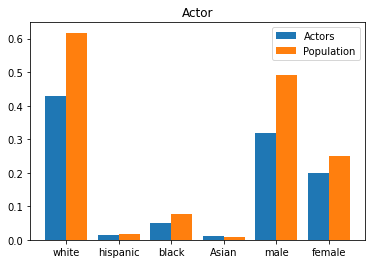

In [46]:
#print(graph.node[0])
actorwhite=0
actorhispanic=0
actorblack=0
actorasian=0
actormale=0
actorfemale=0
directorwhite=0
directornonwhite=0
directormale=0
directorfemale=0
uswhite=0
totacw=0
totach=0
totacb=0
totaca=0
totacm=0
totacfm=0
totdiw=0
totdinw=0
totdim=0
totdifm=0
#-----------------uspop
directorwp=0
totwp=0
directornwp=0
totnwp=0
directormwp=0
totmwp=0
directorfmwp=0
totfmwp=0
#--------------------actor us population
d1=0
d2=0
d3=0
d4=0
d5=0
d6=0
t1=0
t2=0
t3=0
t4=0
t5=0
t6=0
for iwq in graph.nodes():
  valzx=graph.node[iwq]['type']
  if(valzx=='ACTOR'):
    naio=graph.node[iwq]['name']
    for dvbn in galdata:
      if(naio in dvbn and dvbn[20]=='USA'):
        d1+=1
      if(naio in dvbn and dvbn[20]=='USA' and graph.node[iwq]['race']=='White'):
        t1+=1
  if(valzx=='ACTOR'):
    naio=graph.node[iwq]['name']
    for dvbn in galdata:
      if(naio in dvbn and dvbn[20]=='USA'):
        d2+=1
      if(naio in dvbn and dvbn[20]=='USA' and graph.node[iwq]['race']=='Hispanic'):
        t2+=1
  if(valzx=='ACTOR'):
    naio=graph.node[iwq]['name']
    for dvbn in galdata:
      if(naio in dvbn and dvbn[20]=='USA'):
        d3+=1
      if(naio in dvbn and dvbn[20]=='USA' and graph.node[iwq]['race']=='Black'):
        t3+=1
  if(valzx=='ACTOR'):
    naio=graph.node[iwq]['name']
    for dvbn in galdata:
      if(naio in dvbn and dvbn[20]=='USA'):
        d4+=1
      if(naio in dvbn and dvbn[20]=='USA' and graph.node[iwq]['race']=='Asian'):
        t4+=1
  if(valzx=='ACTOR'):
    naio=graph.node[iwq]['name']
    for dvbn in galdata:
      if(naio in dvbn and dvbn[20]=='USA'):
        d5+=1
      if(naio in dvbn and dvbn[20]=='USA' and graph.node[iwq]['gender']=='MALE'):
        t5+=1
  if(valzx=='ACTOR'):
    naio=graph.node[iwq]['name']
    for dvbn in galdata:
      if(naio in dvbn and dvbn[20]=='USA'):
        d6+=1
      if(naio in dvbn and dvbn[20]=='USA' and graph.node[iwq]['gender']=='FEMALE'):
        t6+=1
  if(valzx=='DIRECTOR'):
    naio=graph.node[iwq]['name']
    for dvbn in galdata:
      if(naio in dvbn and dvbn[20]=='USA'):
        directorwp+=1
      if(naio in dvbn and dvbn[20]=='USA' and graph.node[iwq]['race']=='White'):
        totwp+=1
  if(valzx=='DIRECTOR'):
    naio=graph.node[iwq]['name']
    for dvbn in galdata:
      if(naio in dvbn and dvbn[20]=='USA'):
        directornwp+=1
      if(naio in dvbn and dvbn[20]=='USA' and graph.node[iwq]['race']!='White' and graph.node[iwq]['race']!=None):
        totnwp+=1
  if(valzx=='DIRECTOR'):
    naio=graph.node[iwq]['name']
    for dvbn in galdata:
      if(naio in dvbn and dvbn[20]=='USA'):
        directormwp+=1
      if(naio in dvbn and dvbn[20]=='USA' and graph.node[iwq]['gender']=='MALE'):
        totmwp+=1
  if(valzx=='DIRECTOR'):
    naio=graph.node[iwq]['name']
    for dvbn in galdata:
      if(naio in dvbn and dvbn[20]=='USA'):
        directorfmwp+=1
      if(naio in dvbn and dvbn[20]=='USA' and graph.node[iwq]['gender']=='FEMALE'):
        totfmwp+=1
  #---------------------------------------------------
  if(valzx=='DIRECTOR'):
    totdiw+=1
    totdinw+=1
    valzx1=graph.node[iwq]['race']
    if(valzx1=='White'):
      directorwhite+=1
    elif(valzx1!='White' and valzx1!=None):
      directornonwhite+=1
  if(valzx=='DIRECTOR'):
    totdim+=1
    valzx1=graph.node[iwq]['gender']
    if(valzx1=='MALE'):
      directormale+=1
  if(valzx=='DIRECTOR'):
    totdifm+=1
    valzx1=graph.node[iwq]['gender']
    if(valzx1=='FEMALE'):
      directorfemale+=1
  if(valzx=='ACTOR'):
    totacm+=1
    valzx1=graph.node[iwq]['gender']
    if(valzx1=='MALE'):
      actormale+=1
  if(valzx=='ACTOR'):
    totacfm+=1
    valzx1=graph.node[iwq]['gender']
    if(valzx1=='FEMALE'):
      actorfemale+=1
  if(valzx=='ACTOR'):
    totacw+=1
    valzx1=graph.node[iwq]['race']
    if(valzx1=='White'):
      actorwhite+=1
  if(valzx=='ACTOR'):
    totach+=1
    valzx1=graph.node[iwq]['race']
    if(valzx1=='Hispanic'):
      actorhispanic+=1
  if(valzx=='ACTOR'):
    totacb+=1
    valzx1=graph.node[iwq]['race']
    if(valzx1=='Black'):
      actorblack+=1
  if(valzx=='ACTOR'):
    totaca+=1
    valzx1=graph.node[iwq]['race']
    if(valzx1=='Asian'):
      actorasian+=1
  #valzx1=graph.node[iwq]['race']
  #if(valzx=='ACTOR' and valzx1=='White'):
  #  actorwhite+=1
director1=[]
director1.append(totwp/directorwp)
director1.append(totnwp/directornwp)
director1.append(totmwp/directormwp)
director1.append(totfmwp/directorfmwp)
print("---------------------------------")
director2=[]
director2.append(directorwhite/totdiw)
director2.append(directornonwhite/totdinw)
director2.append(directormale/totdim)
director2.append(directorfemale/totdifm)
students = []
students.append(actorwhite/totacw)
students.append(actorhispanic/totach)
students.append(actorblack/totacb)
students.append(actorasian/totaca)
students.append(actormale/totacm)
students.append(actorfemale/totacfm)
student1=[]
student1.append(t1/d1)
student1.append(t2/d2)
student1.append(t3/d3)
student1.append(t4/d4)
student1.append(t5/d5)
student1.append(t6/d6)
import numpy as np 
import matplotlib.pyplot as plt 
  
langs = ['white','hispanic','black','Asian','male','female']
#Ygirls = [10,20,20,40]
#Zboys = [20,30,25,30]
  
X_axis = np.arange(len(langs))
  
plt.bar(X_axis - 0.2, students, 0.4, label = 'Actors')
plt.bar(X_axis + 0.2, student1, 0.4, label = 'Population')
  
plt.xticks(X_axis, langs)
plt.title("Actor")
plt.legend()
plt.show()

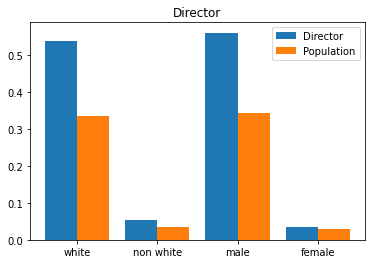

In [47]:
import numpy as np 
import matplotlib.pyplot as plt 
  
langs = ['white','non white','male','female']
#Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(langs))
  
plt.bar(X_axis - 0.2, director1, 0.4, label = 'Director')
plt.bar(X_axis + 0.2, director2, 0.4, label = 'Population')
  
plt.xticks(X_axis, langs)
plt.title("Director")
plt.legend()
plt.show()

In [48]:
pip install community

In [809]:
#--------------------------------Diversity score nulll models----------------------------------------------------

In [810]:
import collections
def actorStats(graph):
    acdict = collections.defaultdict() # this is an actor dictionary
    na = 0                       # Number of actor
    nw = 0                        # number of white 
    nb = 0                        # number of black
    nh = 0                     #number of hispanic
    nm = 0                  #number og multiracial
    nas = 0                        #number of asian
    nai = 0                  # num of asina indian
    nme = 0                # number of middle eastern
    naa = 0            # num of american aborigine
    nnw = 0                     #num of white
    nma = 0                         #num of male
    nfm = 0                       #num of female
    
    white_movies = []                   #white movie array
    nonwhite_movies = []                # non white movie array
    male_movies = []                    # male movie array
    female_movies = []                  #female movie array
    
    avgNumMoviesForWhiteActor = 0        #avg og num of movie for white actor
    avgNumMoviesForNonWhiteActor = 0     # aavf of num of movie for non-white array
    avgNumMoviesForMaleActor = 0        # avg of num of movie for male actor array
    avgNumMoviesForFemaleActor = 0      # avg of num of movie for female actor array

    for node in graph.nodes():                     # for every node
        nty = graph.node[node]["type"]        #type of actor or actor-director
        if nty == "ACTOR" or nty == "ACTOR-DIRECTOR":      # if  only actor or actor-direcctor
            gender = graph.node[node]["gender"]                        # get gender OF THE ACtor
            race = graph.node[node]["race"]         # get race of the actor
            #print(graph.node[node]["gender"],graph.node[node]["race"])
            if(race!=None):
                race=race.capitalize()
            if(gender!=None):
                gender=gender.capitalize()
            if race != None:                                           # if race is not equal to none 
                if race == "White":                                         
                    nw += 1
                    white_movies.append(len(list(graph.predecessors(node))))
                else:
                    nnw += 1
                    #print(len(list(graph.predecessors(node))))
                    nonwhite_movies.append(len(list(graph.predecessors(node))))
            if race == "Black".capitalize():
                nb += 1
            if race == "Hispanic".capitalize():
                nh += 1
            if race == "Multiracial".capitalize():
                nm += 1
            if race == "Asian".capitalize():
                nas += 1
            if race == "AsianIndian".capitalize():
                nai += 1
            if race == "MiddleEastern".capitalize():
                nme += 1
            if race == "AmericanAbori".capitalize():
                naa += 1
            if gender == "Male".capitalize():
                nm += 1 
                male_movies.append(len(list(graph.predecessors(node))))
            if gender == "Female".capitalize():
                nfm += 1
                female_movies.append(len(list(graph.predecessors(node))))
            na += 1

    acdict["numActors"] = na
    acdict["numWhite"] = nw
    acdict["numNonWhite"] = nnw
    acdict["numBlack"] = nb
    acdict["numHispanic"] = nh
    acdict["numMultiracial"] = nm
    acdict["numAsian"] = nas
    acdict["numAsianIndian"] = nai
    acdict["numMiddleEastern"] = nme
    acdict["numAmericanAborigine"] = naa
    acdict["numMale"] = nma
    acdict["numFemale"] = nfm
    #if(len(white_movies)==0):
    #    actorDict["avgNumMoviesForWhiteActor"]=0
    acdict["avgNumMoviesForWhiteActor"] = float(sum(white_movies)) / len(white_movies)
    acdict['avgNumMoviesForNonWhiteActor'] = float(sum(nonwhite_movies)) / len(nonwhite_movies)
    acdict['avgNumMoviesForMaleActor'] = float(sum(male_movies)) / len(male_movies)
    acdict['avgNumMoviesForFemaleActor'] = float(sum(female_movies))/ len(female_movies)
    return acdict

In [811]:
import collections

def genderscorem(graph, nodeId):
  ci = graph.successors(nodeId)
  #print(castIds
  val=0
  for i in range(len(ci)):
    val+=1
    nm = sum(int(graph.node[i]["gender"] == "FEMALE") for i in ci)
  if len(ci) == 0:
    return None
  return nm / float(len(ci))
def rsa(actdic):
  val=0
  for i in range(len(actdic)):
    val+=1
  return int(actdic["race"] != "White")
def rscorem(graph, ni):
  ci = graph.successors(ni)
  numMinorities = sum(rsa(graph.node[i]) for i in ci)
  val=0
  for i in range(len(ci)):
    val+=1
  if len(ci) == 0:
    return None
  return numMinorities / float(len(ci))
def movieStats(graph):
    mdict = collections.defaultdict()
    numMovies = 0
    race_scores = 0
    gender_scores = 0
    numAllWhiteMovies = 0
    numAllNonWhiteMovies = 0
    numAllMaleMovies = 0
    numAllFemaleMovies = 0
    numHalfFemaleMovies = 0
    for node in graph.nodes():
        node_type = graph.node[node]["type"]
        if node_type == "MOVIE":
            race_score = rscorem(graph,node)
            gender_score = genderscorem(graph,node)
            #print(gender_score,race_score)
            if race_score != None:
                race_scores+=race_score
            if gender_score != None:
                gender_scores+=gender_score
            if race_score == 0: # all white cast
                numAllWhiteMovies += 1
            else:
                numAllNonWhiteMovies += 1
            if gender_score == 0: # all male cast
                numAllMaleMovies += 1
            if gender_score == 1: # all female cast
                numAllFemaleMovies += 1
            if(gender_score!=None and gender_score>=0.5):#if gender_score >= 0.5:
                numHalfFemaleMovies += 1
            numMovies += 1

    mdict["numMovies"] = numMovies
    mdict["avgRacialDiversityScore"] = float(race_scores) / float(race_scores)
    mdict["avgGenderDiversityScore"] = float(gender_scores) / float(gender_scores)
    mdict["numAllWhiteMovies"] = numAllWhiteMovies
    mdict["numAllNonWhiteMovies"] = numAllNonWhiteMovies
    mdict["numAllMaleMovies"] = numAllMaleMovies
    mdict["numAllFemaleMovies"] = numAllFemaleMovies
    mdict["numHalfFemaleMovies"] = numHalfFemaleMovies
    return mdict

In [812]:
#graph.neighbors(5446)
act=graph.successors(224)
act

[]

In [813]:
import collections
def racialScoreForDirector(graph, nodeId):
    movieIds = graph.successors(nodeId)
    movieScoresTemp = [rscorem(graph, i) for i in movieIds]
    movieScores = [score for score in movieScoresTemp if score != None]
    if len(movieScores) == 0:
        return None
    return sum(movieScores) / float(len(movieScores))
def genderScoreForDirector(graph, nodeId):
    movieIds = graph.successors(nodeId)
    #movieScoresTemp = []
    #for i in movieIds:
    #  ci = graph.successors(nodeId)
    #  #print(castIds
    #  val=0
    #  for i in range(len(ci)):
    #    val+=1
    #    nm = sum(int(graph.node[i]["gender"] == "FEMALE") for i in ci)
    #  if len(ci) == 0:
    #    movieScoresTemp.append(None)
    #  else:
    #    movieScoresTemp.append(nm / float(len(ci)))
    movieScoresTemp = [genderscorem(graph, i) for i in movieIds]
    movieScores = [score for score in movieScoresTemp if score != None]
    if len(movieScores) == 0:
        return None
    return sum(movieScores) / float(len(movieScores))
def directorStats(directorMovieGraph, graph, graphDict):
    directorDict = collections.defaultdict()
    numDirectors = 0
    race_scores = []
    gender_scores = []
    numWhiteDirectors = 0
    numNonWhiteDirectors = 0
    numMaleDirectors = 0
    numFemaleDirectors = 0
    for node in directorMovieGraph.nodes():
        node_type = directorMovieGraph.node[node]["type"]
        if node_type == "DIRECTOR" or node_type == "ACTOR-DIRECTOR":
            #print(node_type)
            if directorMovieGraph.node[node]['race'] is None or directorMovieGraph.node[node]['gender'] is None:
                continue
            directorName = directorMovieGraph.node[node]['name']
            #print(directorName,graphDict[directorName],graph.successors(graphDict[directorName]))
            race_score = racialScoreForDirector(graph, graphDict[directorName])
            gender_score = genderScoreForDirector(graph, graphDict[directorName])
            if race_score != None:
                race_scores.append(race_score)
            if gender_score != None:
                gender_scores.append(gender_score)
            numDirectors += 1
            mal1=""
            fem1=""
            rac1=""
            if(directorMovieGraph.node[node]["gender"]!=None):
                mal1=directorMovieGraph.node[node]["gender"].capitalize()
            if(directorMovieGraph.node[node]["gender"]!=None):
                fem1=directorMovieGraph.node[node]["gender"].capitalize()
            if(directorMovieGraph.node[node]["race"]!=None):
                rac1=directorMovieGraph.node[node]["race"].capitalize()
            if mal1 == "Male".capitalize():
                numMaleDirectors += 1
            if fem1 == "Female".capitalize():
                numFemaleDirectors += 1
            if rac1 == "White".capitalize():
                numWhiteDirectors += 1
            else:
                numNonWhiteDirectors += 1

    directorDict["numDirectors"] = numDirectors
    directorDict["avgRacialDiversityScore"] = float(sum(race_scores)) / float(len(race_scores))
    directorDict["avgGenderDiversityScore"] = float(sum(gender_scores)) / float(len(race_scores))
    directorDict["numWhiteDirectors"] = numWhiteDirectors
    directorDict["numNonWhiteDirectors"] = numNonWhiteDirectors
    directorDict["numMaleDirectors"] = numMaleDirectors
    directorDict["numFemaleDirectors"] = numFemaleDirectors
    return directorDict

In [814]:
from itertools import combinations
import community
def multiToWeightedGraph(multiGraph):
    weightedGraph = nx.Graph()
    for u, v in multiGraph.edges():
        if (u, v) not in weightedGraph.edges():
            #print("hello",u,v)
            weightedGraph.add_edge(u, v, weight=0)
        weightedGraph.edge[u][v]['weight'] += 1
    return weightedGraph
def actorActorGraph(graph):
    aaGraph = nx.MultiGraph()
    movieIds = [nId for nId in graph if graph.node[nId]['type'] == 'MOVIE']
    for mId in movieIds:
        actorIds = graph.successors(mId)
        for aId in actorIds:
            if aId not in aaGraph:
                aaGraph.add_node(aId, graph.node[aId])
                #print("   adsadsadasdadsadasdasdasdasdasdasdasdasdasdsadasda",graph.node[aId])
        for actorId1, actorId2 in combinations(actorIds, 2):
            aaGraph.add_edge(actorId1, actorId2)
    return aaGraph
def actorModularity(graph):
    aaGraph = actorActorGraph(graph)
    rp = {}
    bwp = {}
    gp = {}
    raceToInt = {'White': 0,'Black': 1,'Hispanic': 2,'Multiracial': 3,'Asian': 4,'AsianIndian': 5,'MiddleEastern': 6,'AmericanAbori': 7,None: 8,}
    #aaGraph = multiToWeightedGraph(aaGraph)
    for nId in aaGraph.nodes():
        actorRace = aaGraph.node[nId]['race']
        actorGender = aaGraph.node[nId]['gender']
        #print(actorRace,actorGender)
        #if actorRace in raceToInt:
        #if(actorRace=='')
        rp[nId] = raceToInt[actorRace]
        bwp[nId] = 0 if raceToInt[actorRace] == 0 else 1
        gp[nId] = 0 if actorGender == 'MALE' else 1
    #print("h-h-h-h-h-h-h-h-h-h-h-Before",len(aaGraph))
    #aaGraph = multiToWeightedGraph(aaGraph)
    arr=aaGraph.nodes()
    print(aaGraph.nodes())
    #print("h-h-h-h-h-h-h-h-h-h-h-After",len(aaGraph))
    #print(racePartition,blackWhitePartition)
    #for docv in arr:
    #  if(docv not in racePartition):
    #    racePartition[docv]=0
    #  if(docv not in blackWhitePartition):
    #    blackWhitePartition[docv]=0
    #community.m
    raceModularity = community.modularity(rp, aaGraph)
    blackWhiteModularity = community.modularity(bwp, aaGraph)
    genderModularity = community.modularity(gp, aaGraph)
    return (raceModularity, blackWhiteModularity, genderModularity)

In [815]:
def getBlackWhiteGraph(graph):
  graph = graph.copy()
  for nId in graph.nodes():
    if graph.node[nId]['type'] != 'MOVIE':
      if graph.node[nId]['race'] is None:
        graph.remove_node(nId)
      else:
        race = graph.node[nId]['race']
        graph.node[nId]['race'] = 'WHITE' if race == 'WHITE' else 'Non-White'
  return graph

In [816]:
def actorAssortativity(graph):
    aaGraph = actorActorGraph(graph)
    raceAssortativity = nx.attribute_assortativity_coefficient(aaGraph, 'race')
    blackWhiteAAGraph = actorActorGraph(getBlackWhiteGraph(graph))
    blackWhiteAssortativity = nx.attribute_assortativity_coefficient(blackWhiteAAGraph, 'race')
    genderAssortativity = nx.attribute_assortativity_coefficient(aaGraph, 'gender')
    return (raceAssortativity, blackWhiteAssortativity, genderAssortativity)

In [817]:
def actorDirectorAssortativityHeuristic(graph, directorMovieGraph, graphDict):
    numSameRaceEdges = 0
    numSameGenderEdges = 0
    totalEdges = 0
    #print("hello")
    for mId in directorMovieGraph.nodes():
        if directorMovieGraph.node[mId]['type'] == 'MOVIE':
            diredctorId = directorMovieGraph.predecessors(mId)[0]
            directorRace = directorMovieGraph.node[diredctorId]['race']
            if directorRace is None:
                continue
            directorGender = directorMovieGraph.node[diredctorId]['gender']
            actorIds = [graphDict[actorName] for actorName in directorMovieGraph.node[mId]['actorNames'] if actorName in graphDict]
            actorRaces = [graph.node[aId]['race'] for aId in actorIds if aId in graph.node and "race" in graph.node[aId]]
            actorGenders = [graph.node[aId]['gender'] for aId in actorIds if aId in graph.node and "gender" in graph.node[aId]]
            numSameRaceEdges += sum(1 for ar in actorRaces 
                if (ar == 'White' and directorRace == 'White') or (ar != 'White' and directorRace != 'White'))
            numSameGenderEdges += sum(1 for ag in actorGenders if ag == directorGender)
            totalEdges += len(actorIds)
    return (numSameRaceEdges / float(totalEdges), numSameGenderEdges / float(totalEdges))

In [818]:

def movieActorNullModel(graph):
    nm = graph.copy()
    actorIds = []#[nId for nId in nm.nodes() if nm.node[nId]['type'] in ['ACTOR', 'ACTOR-DIRECTOR']]
    #print(actorIds)
    for i in nm.nodes():
      if(nm.node[i]['type']=='ACTOR' or nm.node[i]['type']=='ACTOR-DIRECTOR'):
        actorIds.append(i)
    movieIds = []#[nId for nId in nm.nodes() if nm.node[nId]['type'] == 'MOVIE']
    for j in nm.nodes():
      if(nm.node[j]['type']=='MOVIE'):
        movieIds.append(j)
    #print(movieIds)
    for mId in movieIds:
        castSize = nm.out_degree(mId)
        nm.remove_edges_from(nm.out_edges(mId))
        randomCast = np.random.choice(actorIds, castSize, replace=False)
        nm.add_edges_from([(mId, aId) for aId in randomCast])
    return nm

In [840]:
from networkx.algorithms import bipartite
def moviedirectornullmodel(graph):
    dir = []
    for nid in graph:
      if(graph.node[nid]['type']=='ACTOR-DIRECTOR' or graph.node[nid]['type']=='DIRECTOR'):
        dir.append(nid)
    dird = []
    for ndid in dir:
      dird.append(graph.out_degree(ndid))
    sdird = sorted(dir, key=lambda ndid: graph.out_degree(ndid))
    movieIds = []
    for nrid in graph:
      if(graph.node[nrid]['type'] == 'MOVIE'):
        movieIds.append(nrid)
    movieDegrees = []
    for ij in movieIds:
      movieDegrees.append(1)
    nullModel = bipartite.configuration_model(dird, movieDegrees, create_using=nx.Graph())
    zeroIds = []
    for ih in nullModel:
      if(nullModel.node[ih]['bipartite']==0):
        zeroIds.append(ih)
    sortedZeroIds = sorted(zeroIds, key=lambda nId: nullModel.degree(nId))
    oneIds = []
    for iah in nullModel:
      if(nullModel.node[iah]['bipartite'] == 1):
        oneIds.append(iah)
    for i in range(len(sortedZeroIds)):
        nullModel.node[sortedZeroIds[i]].update(graph.node[sdird[i]])
    for i in range(len(oneIds)):
        nullModel.node[oneIds[i]].update(graph.node[movieIds[i]])
    #nullModel = bipartiteToDirectedGraph(nullModel)
    directedGraph = nx.DiGraph()
    for u, v in nullModel.edges():
        if u not in directedGraph.nodes():
            directedGraph.add_node(u, nullModel.node[u])
        if v not in directedGraph.nodes():
            directedGraph.add_node(v, nullModel.node[v])
        if nullModel.node[u]['bipartite'] == 0:
            directedGraph.add_edge(u, v)
        else:
            directedGraph.add_edge(v, u)
    #print("chchchchchchchchchchchchchc",nullModel.edges())
    return directedGraph

In [820]:
def profitStats(graph, node):
    race_score = rscorem(graph,node)
    gender_score = genderscorem(graph,node)
    ratio = None
    if graph.node[node]["budget"] != 0:
        ratio = graph.node[node]["gross"] / float(graph.node[node]["budget"])
    return (race_score, gender_score, ratio)


In [821]:
def dpc(graph, movieIds=None):
    raceScores = []
    genderScores = []
    profitRatios = []
    if not movieIds:
        movieIds = [nId for nId in graph.nodes() if graph.node[nId]["type"] == "MOVIE"]
    for mId in movieIds:
        if graph.node[mId]["type"] == "MOVIE":
            data = profitStats(graph, mId)
            if data[0] != None and data[1] != None and data[2] != None: 
                raceScores.append(data[0])
                genderScores.append(data[1])
                profitRatios.append(data[2])

    correlations = np.corrcoef([raceScores, genderScores, profitRatios])

    return correlations[0,2], correlations[1,2]

In [822]:
import collections

#--------------------------------------------------------------------------------------------------------------------------
# Null Model
print("-----------------------------------------------Null Model------------------------------------")
movieActorNullModel = movieActorNullModel(graph)
movieStatsBaseline = movieStats(movieActorNullModel)
print("-----------------------------------------------Movie Status after null model-------------------")
print(movieStatsBaseline)
arrfornullmo=[]
arrfornullmo.append(movieStatsBaseline['numAllWhiteMovies'])
arrfornullmo.append(movieStatsBaseline['numAllNonWhiteMovies'])
arrfornullmo.append(movieStatsBaseline['numAllMaleMovies'])
arrfornullmo.append(movieStatsBaseline['numAllFemaleMovies'])
arrfornullmo.append(movieStatsBaseline['numHalfFemaleMovies'])
#modularity
raceModularityBaseline, blackWhiteModularityBaseline, genderModularityBaseline = actorModularity(movieActorNullModel)
print(raceModularityBaseline)
print(blackWhiteModularityBaseline)
print(genderModularityBaseline)
#assortivity
raceAssorativityBaseline, blackWhiteAssorativityBaseline, genderAssorativityBaseline =actorAssortativity(movieActorNullModel)
#--------------------------------------------------------------------------------------------------------------------------
#null model2
print("-----------------------------------------------Actor director Assortavity------------------------------------")
moviedirectornullmodel = moviedirectornullmodel(graph)
directorStatsBaseline = directorStats(moviedirectornullmodel, graph, graphdict)
# Assoritivity
p1, p2 = actorDirectorAssortativityHeuristic(graph, moviedirectornullmodel, graphdict)
print("-----Assoritivity")
print(p1)
print(p2)
#box office correlation
print("-----box office correlation")
raceCorrelation, genderCorrelation =dpc(graph)
print(raceCorrelation)
print(genderCorrelation)

-----------------------------------------------Null Model------------------------------------
-----------------------------------------------Movie Status after null model-------------------
defaultdict(None, {'numMovies': 3611, 'avgRacialDiversityScore': 1.0, 'avgGenderDiversityScore': 1.0, 'numAllWhiteMovies': 2137, 'numAllNonWhiteMovies': 1474, 'numAllMaleMovies': 1217, 'numAllFemaleMovies': 451, 'numHalfFemaleMovies': 1404})
[2093, 4186, 897, 2762, 5742, 3467, 1205, 56, 5845, 7743, 1212, 6878, 3282, 4190, 5540, 8304, 1102, 204, 6467, 7578, 7087, 129, 4391, 5235, 2968, 841, 9303, 7869, 1695, 7492, 385, 4767, 3215, 659, 1724, 7269, 7246, 209, 754, 2384, 8869, 6179, 4000, 1935, 2229, 3584, 5326, 900, 84, 7698, 1705, 3116, 9341, 5112, 1546, 5924, 740, 758, 3948, 3880, 5828, 77, 1842, 3934, 3756, 8381, 823, 4289, 1690, 7741, 7488, 1000, 7255, 5934, 4264, 5411, 267, 7053, 1965, 4654, 4830, 3739, 587, 3433, 3424, 4691, 932, 2007, 2916, 2848, 1801, 4585, 715, 933, 2668, 3329, 426, 3114, 644

/usr/local/lib/python3.7/dist-packages/networkx/algorithms/assortativity/correlation.py:262: RuntimeWarning: invalid value encountered in true_divide
  r=(t-s)/(1-s)


-----------------------------------------------Actor director Assortavity------------------------------------
-----Assoritivity
0.7724153199025903
0.6530883329643569
-----box office correlation
-0.008805986836550197
0.0009214613273146575


In [823]:
import collections
# here we calculated the actorstatus
actorStats =actorStats(graph)
print("-----------------------------------------------Actor Status------------------------------------")
print(actorStats)
#here we calculated the moviestatus
movieStats = movieStats(graph)
print("-----------------------------------------------Movie Status------------------------------------")
print(movieStats)
arrfornullmo1=[]
arrfornullmo1.append(movieStats['numAllWhiteMovies'])
arrfornullmo1.append(movieStats['numAllNonWhiteMovies'])
arrfornullmo1.append(movieStats['numAllMaleMovies'])
arrfornullmo1.append(movieStats['numAllFemaleMovies'])
arrfornullmo1.append(movieStats['numHalfFemaleMovies'])
#here we calculated the directorstatus
directorStats = directorStats(graph, graph, graphdict)
print("-----------------------------------------------Director Status------------------------------------")
print(directorStats)
# modularity on the bases of blackwhite,race,gender
#raceModularity, blackWhiteModularity, genderModularity = actorModularity(graph)
#print("-----------------------------------------------Modularity Actor------------------------------------")
#print(raceModularity)
#print(blackWhiteModularity)
#print(genderModularity)
# assortivity on the bases of blackwhite,race,gender
raceAssorativity, blackWhiteAssorativity, genderAssorativity = actorAssortativity(graph)
print("-----------------------------------------------Assortativity Actors------------------------------------")
print(raceAssorativity)
print(blackWhiteAssorativity)
print(genderAssorativity)
# assortativity for actordirector
proportionSameRace, proportionSameGender = actorDirectorAssortativityHeuristic(graph, graph, graphdict)
print("-----------------------------------------------Assortativity actordirector------------------------------------")
print(proportionSameRace)
print(proportionSameGender)


-----------------------------------------------Actor Status------------------------------------
defaultdict(None, {'numActors': 2179, 'numWhite': 1798, 'numNonWhite': 381, 'numBlack': 212, 'numHispanic': 61, 'numMultiracial': 1409, 'numAsian': 47, 'numAsianIndian': 0, 'numMiddleEastern': 5, 'numAmericanAborigine': 5, 'numMale': 0, 'numFemale': 821, 'avgNumMoviesForWhiteActor': 3.6140155728587318, 'avgNumMoviesForNonWhiteActor': 3.2388451443569553, 'avgNumMoviesForMaleActor': 3.8394698085419736, 'avgNumMoviesForFemaleActor': 3.0669914738124238})
-----------------------------------------------Movie Status------------------------------------
defaultdict(None, {'numMovies': 3611, 'avgRacialDiversityScore': 1.0, 'avgGenderDiversityScore': 1.0, 'numAllWhiteMovies': 2395, 'numAllNonWhiteMovies': 1216, 'numAllMaleMovies': 1387, 'numAllFemaleMovies': 330, 'numHalfFemaleMovies': 1214})
-----------------------------------------------Director Status------------------------------------
defaultdict(

/usr/local/lib/python3.7/dist-packages/networkx/algorithms/assortativity/correlation.py:262: RuntimeWarning: invalid value encountered in true_divide
  r=(t-s)/(1-s)


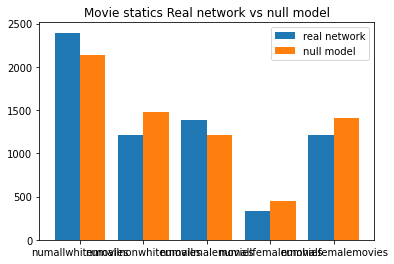

In [862]:
import numpy as np 
import matplotlib.pyplot as plt 
  
langs = ['numallwhitemovies','numallnonwhitemovies','numallmalemovies','numallfemalemovies','numhalfemalemovies']
#Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(langs))
  
plt.bar(X_axis - 0.2, arrfornullmo1, 0.4, label = 'real network')
plt.bar(X_axis + 0.2, arrfornullmo, 0.4, label = 'null model')
  
plt.xticks(X_axis, langs)
plt.title("Movie statics Real network vs null model")
plt.legend()
plt.show()

In [825]:
# ----------------------------Time Series part

In [848]:
def fna(graph, graphDict):
    for nId in graph.nodes():
        node = graph.node[nId]
        if node['type'] == 'ACTOR':
            if node['race'] is None or node['gender'] is None:
                graphDict.pop(node["name"], None)
                graph.remove_node(nId)
        elif node['type'] == 'ACTOR-DIRECTOR':
            if node['race'] is None or node['gender'] is None:
                graph.remove_edges_from(graph.in_edges(nId))
                node['type'] = 'DIRECTOR'
    return (graph, graphDict)

In [849]:
def filg(graph, graphDict):
    graph, graphDict = fna(graph, graphDict)
    # Remove all movies yet to be released
    for nodeId in graph.nodes():
        node = graph.node[nodeId]
        if node['type'] == 'MOVIE' and node['releaseYear'] < 1970:
            graphDict.pop("%s%i" % (node["title"], node["releaseYear"]), None)
            graph.remove_node(nodeId)

    # Remove all people no longer involved in any movies
    for nodeId in graph.nodes():
        node = graph.node[nodeId]
        if node['type'] != 'MOVIE' and graph.degree(nodeId) == 0:
            graphDict.pop(node["name"], None)
            graph.remove_node(nodeId)

    return graph, graphDict

In [850]:
def dpc(graph, movieIds=None):
    raceScores = []
    genderScores = []
    profitRatios = []
    if not movieIds:
        movieIds = [nId for nId in graph.nodes() if graph.node[nId]["type"] == "MOVIE"]
    for mId in movieIds:
        if graph.node[mId]["type"] == "MOVIE":
            data = profitStats(graph, mId)
            if data[0] != None and data[1] != None and data[2] != None: 
                raceScores.append(data[0])
                genderScores.append(data[1])
                profitRatios.append(data[2])

    correlations = np.corrcoef([raceScores, genderScores, profitRatios])

    return correlations[0,2], correlations[1,2]

In [854]:
def generateNextTimeStep(tsg, graph, releasedMovieIds, year):
  arr=[]
  for mid in releasedMovieIds:
    directorId = graph.predecessors(mid)[0]
    arr.append(mid)
    tsg.add_node(mid)
    arr.append(mid)
    tsg.node[mid] = graph.node[mid]
    arr.append(mid)
    tsg.add_node(directorId)
    arr.append(mid)
    tsg.node[directorId] = graph.node[directorId]
    arr.append(mid)
    tsg.add_edge(directorId, mid)
    arr.append(mid)
    # Add all actors in that movie
    arr1=[]
    for asid in graph.successors(mid):
      arr1.append(asid)
      tsg.add_node(asid)
      arr1.append(asid)
      arr1.append(asid)
      tsg.node[asid] = graph.node[asid]
      arr1.append(asid)
      tsg.add_edge(mid, asid)
      arr1.append(asid)
  return tsg

In [855]:
yValues = [[] for i in ["race","gender"]] if arr else [[]]
print(yValues)

[[], []]


In [856]:
from collections import defaultdict
from matplotlib import pyplot
def ts(graph, graphDict, timeSeriesFunc):
  mb = defaultdict(list)
  for nodeId in graph.nodes():
    node = graph.node[nodeId]
    if node["type"] == "MOVIE":
      mb[node["releaseYear"]].append(nodeId)
  years = mb.keys()
  print(years)
  years=sorted(years)
  years=list(years)
  print(years)
  arr=["Race", "Gender"]
  art = [[] for i in arr] if arr else [[]]
  tsg = nx.DiGraph()
  for i in range(len(years)):
    year = years[i]
    tsg = generateNextTimeStep(tsg, graph, mb[year], year)
    stepYValues = timeSeriesFunc(tsg)#, mb[year])
    for index, y in enumerate(stepYValues):
      #yValues[index].append(y)
      if(index<len(art)):
        art[index].append(y)
      else:
        art[1].append(y)
  acfi=[]
  for dci in range(len(art[1])):
    if((dci+1)%2==0 ):
      acfi.append(art[1][dci])
  art[1]=acfi
  print(len(art[0]),len((art[1])))
  for i, ys in enumerate(art):
    pyplot.plot(years, ys)
  pyplot.legend(["Race","gender"])
  pyplot.xlabel("Year")
  pyplot.ylabel('ass')
  pyplot.title('ac-ac assosrtativity ')
  #if arr: pyplot.legend()
  pyplot.show()

In [858]:
def ts1(graph, graphDict):
  mb = defaultdict(list)
  for nodeId in graph.nodes():
    node = graph.node[nodeId]
    if node["type"] == "MOVIE":
      mb[node["releaseYear"]].append(nodeId)
  years = mb.keys()
  print(years)
  years=sorted(years)
  years=list(years)
  print(years)
  arr=["Race", "Gender"]
  yValues = [[] for i in arr] if arr else [[]]
  tsg = nx.DiGraph()
  for i in range(len(years)):
    year = years[i]
    tsg = generateNextTimeStep(tsg, graph, mb[year], year)
    stepYValues = [dpc(tsg, mb[year])[0],dpc(tsg, mb[year])[1]]

    for index, y in enumerate(stepYValues):
      yValues[index].append(y)
  for i, ys in enumerate(yValues):
    pyplot.plot(years, ys)
  pyplot.legend(["Race","gender"])
  pyplot.xlabel("years")
  pyplot.ylabel("Rev and Budget")
  pyplot.title("Prof correlatio")
  #if arr: pyplot.legend()
  pyplot.axis([years[0], years[-1], -1 if min([min(l) for l in yValues]) < 0 else 0, 1])
  pyplot.show()

In [859]:
def ts2(graph):#, title, yLabel, legendLabels):
  # Categorize movie nodes by release year
  mb = defaultdict(list)
  for nodeId in graph.nodes():
    node = graph.node[nodeId]
    if node["type"] == "MOVIE":
      #print(node["releaseYear"])
      mb[node["releaseYear"]].append(nodeId)
  
  years = mb.keys()
  print(years)
  years=sorted(years)
  years=list(years)
  print(years)
  arrforlg=["Director gender", "Director racial", "Movie gender", "Movie racial"]
  yValues = [[] for i in arrforlg] if arrforlg else [[]]
  # Step through each year and build up our graph and data over time
  tsg = nx.DiGraph()
  #bar = progressbar.ProgressBar()
  for i in range(len(years)):
    year = years[i]
    tsg = generateNextTimeStep(tsg, graph, mb[year], year)
    scores = []
    for dId in tsg.nodes():
      if tsg.node[dId]['type'] == 'DIRECTOR' or tsg.node[dId]['type'] == 'ACTOR-DIRECTOR':
        #score = genderScoreForDirector(graph, dId)
        movieIds = graph.successors(dId)
        movieScoresTemp = [genderscorem(graph, i) for i in movieIds]
        ms = [score for score in movieScoresTemp if score != None]
        if len(ms) == 0:
          score=None
        else:
          score=sum(ms) / float(len(ms))
        if score is not None:
          scores.append(score)
    alio=[]
    alio.append(np.mean(scores))
    arr1=alio
    for azt in range(9):
        gkop=graph[0]
    arr2=[]#ads(tsg)
    scores1 = []
    for dId in tsg.nodes():
        if tsg.node[dId]['type'] == 'DIRECTOR' or tsg.node[dId]['type'] == 'ACTOR-DIRECTOR':
            score = racialScoreForDirector(tsg, dId)
            if score is not None:
                scores1.append(score)
    arr2.append(np.mean(scores1))
    arr3=[]
    scores2 = []
    for mId in tsg.nodes():
        if tsg.node[mId]['type'] == 'MOVIE':
            score = genderscorem(tsg, mId)
            if score is not None:
                scores2.append(score)
    arr3.append(np.mean(scores2))
    arr4=[]
    scores3 = []
    for mId in tsg.nodes():
        if tsg.node[mId]['type'] == 'MOVIE':
            score = rscorem(tsg, mId)
            if score is not None:
                scores3.append(score)
    arr4.append(np.mean(scores3))
    ult_arr=[]
    ult_arr.append(arr1)
    ult_arr.append(arr2)
    ult_arr.append(arr3)
    ult_arr.append(arr4)
    stepYValues=ult_arr
    
    for index, y in enumerate(stepYValues):
      yValues[index].append(y)
  for azt in range(9):
    gkop=graph[0]    
  for i, ys in enumerate(yValues):
    pyplot.plot(years, ys)
  pyplot.legend(["Dire-gender","direct-racial","actor-gender","actor-racial"])
  pyplot.xlabel("years")
  pyplot.ylabel("diver scor")
  pyplot.title("Holl diver Time")
  pyplot.show()

In [860]:
def ts3(graph, graphDict):#, timeSeriesFunc):#, title, yLabel, legendLabels):
  # Categorize movie nodes by release year
  mb = defaultdict(list)
  for nodeId in graph.nodes():
    node = graph.node[nodeId]
    if node["type"] == "MOVIE":
      #print(node["releaseYear"])
      mb[node["releaseYear"]].append(nodeId)
  years = mb.keys()
  #print(years)
  years=sorted(years)
  years=list(years)
  #print(years)
  arr=["Race", "Gender"]
  yv = [[] for i in arr] if arr else [[]]
  tsg = nx.DiGraph()
  #bar = progressbar.ProgressBar()
  for i in range(len(years)):
    year = years[i]
    tsg = generateNextTimeStep(tsg, graph, mb[year], year)
    
    gapj=moviedirectornullmodel(tsg)
    
    nsre = 0
    nsg = 0
    te = 0
    #print("hello")
    for mId in gapj.nodes():
        if gapj.node[mId]['type'] == 'MOVIE':
            diredctorId = gapj.predecessors(mId)[0]
            directorRace = gapj.node[diredctorId]['race']
            if directorRace is None:
                continue
            directorGender = gapj.node[diredctorId]['gender']
            actorIds = []
            for acn in gapj.node[mId]['actorNames']:
              if(acn in graphDict):
                for azt in range(9):
                    gkop=graph[0]
                actorIds.append(graphDict[acn])
            actorRaces = []
            for aci in actorIds:
              if(aci in tsg.node and "race" in tsg.node[aci]):
                actorRaces.append(tsg.node[aci]['race'])
                for azt in range(9):
                    gkop=graph[0]
            actorGenders = []
            for fgh in actorIds:
              if(fgh in tsg.node and "gender" in tsg.node[fgh]):
                actorGenders.append(tsg.node[fgh]['gender'])
                for azt in range(9):
                    gkop=graph[0]
            nsre += sum(1 for ar in actorRaces if (ar == 'White' and directorRace == 'White') or (ar != 'White' and directorRace != 'White'))
            nsg += sum(1 for ag in actorGenders if ag == directorGender)
            te += len(actorIds)
    stepYValues = (nsre / float(te), nsg / float(te))
    
    for index, y in enumerate(stepYValues):
      for azt in range(9):
        gkop=graph[0]
      yv[index].append(y)
  for i, ys in enumerate(yv):
    pyplot.plot(years, ys)
  pyplot.xlabel("year")
  for azt in range(9):
    gkop=graph[0]
  pyplot.legend(["Race","gender"])
  pyplot.ylabel("assortativity")
  pyplot.title("ac-dir assortativity with time")
  pyplot.show()

dict_keys([2009, 2007, 2015, 2012, 2010, 2016, 2006, 2008, 2013, 2011, 2014, 2005, 1997, 2004, 1999, 1995, 2003, 2001, 2002, 1998, 2000, 1990, 1991, 1994, 1996, 1982, 1993, 1992, 1989, 1988, 1978, 1980, 1984, 1985, 1987, 1986, 1973, 1983, 1979, 1981, 1977, 1970, 1974, 1975, 1971, 1972, 1976])
[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


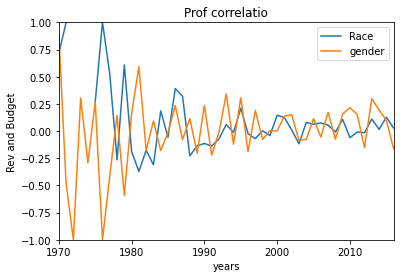

dict_keys([2009, 2007, 2015, 2012, 2010, 2016, 2006, 2008, 2013, 2011, 2014, 2005, 1997, 2004, 1999, 1995, 2003, 2001, 2002, 1998, 2000, 1990, 1991, 1994, 1996, 1982, 1993, 1992, 1989, 1988, 1978, 1980, 1984, 1985, 1987, 1986, 1973, 1983, 1979, 1981, 1977, 1970, 1974, 1975, 1971, 1972, 1976])
[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


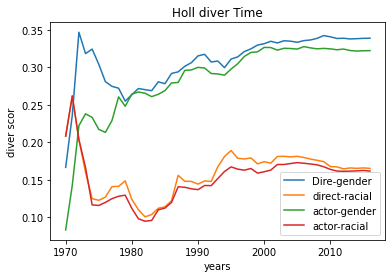

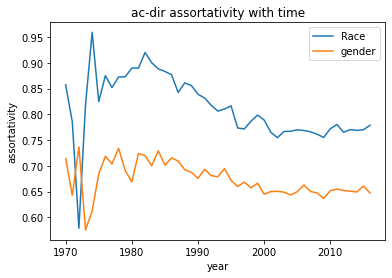

dict_keys([2009, 2007, 2015, 2012, 2010, 2016, 2006, 2008, 2013, 2011, 2014, 2005, 1997, 2004, 1999, 1995, 2003, 2001, 2002, 1998, 2000, 1990, 1991, 1994, 1996, 1982, 1993, 1992, 1989, 1988, 1978, 1980, 1984, 1985, 1987, 1986, 1973, 1983, 1979, 1981, 1977, 1970, 1974, 1975, 1971, 1972, 1976])
[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


/usr/local/lib/python3.7/dist-packages/networkx/algorithms/assortativity/correlation.py:262: RuntimeWarning: invalid value encountered in true_divide
  r=(t-s)/(1-s)


47 47


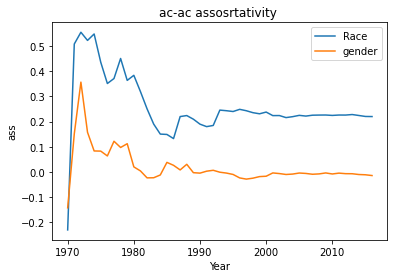

7363 7408


In [861]:

graph, gdict = filg(graph, graphdict)
g = ts1(graph, gdict)
g1=ts2(graph)
g2=ts3(graph, gdict)
g3=ts(graph, gdict,actorAssortativity)
print(len(graph),len(graphdict))